In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
import pandas as pd

<ipython-input-1-dc7b28219ec0>:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
print(os.getcwd())  
file_path = './data/STELLARHOSTS_2024.10.12_06.33.44.csv'
print(os.path.exists(file_path)) 

/drive/notebooks/PIANETI_STELLE_ETC
True


In [3]:
# Carica il file CSV, saltando le righe che iniziano con '#' e ignorando eventuali righe malformate
df = pd.read_csv(file_path, comment='#', sep=',', on_bad_lines='skip', encoding='utf-8')

# Mostra le prime righe per verificare se il file è stato caricato correttamente
print(df.head())

   loc_rowid sy_name                       gaia_id  \
0          1  11 Com  Gaia DR2 3946945413106333696   
1          2  11 Com  Gaia DR2 3946945413106333696   
2          3  11 Com  Gaia DR2 3946945413106333696   
3          4  11 Com  Gaia DR2 3946945413106333696   
4          5  11 Com  Gaia DR2 3946945413105333632   

                                          st_refname  st_teff  st_mass  
0  <a refstr=CANNON___PICKERING_1918 href=https:/...      NaN      NaN  
1  <a refstr=TENG_ET_AL__2023 href=https://ui.ads...   4874.0     2.09  
2  <a refstr=KUNITOMO_ET_AL__2011 href=https://ui...      NaN     2.60  
3  <a refstr=MORTIER_ET_AL__2013 href=https://ui....   4830.0     2.04  
4  <a refstr=STASSUN_ET_AL__2019 href=https://ui....   4415.0     0.69  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44914 entries, 0 to 44913
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   loc_rowid   44914 non-null  int64  
 1   sy_name     44914 non-null  object 
 2   gaia_id     43613 non-null  object 
 3   st_refname  44741 non-null  object 
 4   st_teff     36794 non-null  float64
 5   st_mass     27018 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.5+ MB


In [8]:
# 1. Seleziona solo le colonne gaia_id e st_teff
df_gaia_teff = df[['gaia_id', 'st_teff']]

# 2. Filtra il DataFrame per rimuovere le righe dove st_teff è NaN
df_gaia_teff_cleaned = df_gaia_teff.dropna(subset=['st_teff'])

df = df_gaia_teff_cleaned

# Visualizza il nuovo DataFrame
print(df)

                            gaia_id  st_teff
1      Gaia DR2 3946945413106333696   4874.0
3      Gaia DR2 3946945413106333696   4830.0
4      Gaia DR2 3946945413105333632   4415.0
5      Gaia DR2 3946945413106333696   4755.0
6      Gaia DR2 3946945413106333696   4742.0
...                             ...      ...
44907  Gaia DR2 4298361114750843904   4841.0
44908  Gaia DR2 4298361114750843904   4707.0
44911  Gaia DR2 4298361114750843904   4805.2
44912  Gaia DR2 4298361114750843904   4780.0
44913  Gaia DR2 4298361114750843904   4714.0

[36794 rows x 2 columns]


# Rimuovi "Gaia DR2" dai valori della colonna gaia_id
df_gaia_teff_cleaned['gaia_id'] = df_gaia_teff_cleaned['gaia_id'].str.replace('Gaia DR2 ', '', regex=False)

In [11]:
df

,gaia_id,st_teff
1,3946945413106333696,4874.0
3,3946945413106333696,4830.0
4,3946945413105333632,4415.0
5,3946945413106333696,4755.0
6,3946945413106333696,4742.0
...,...,...
44907,4298361114750843904,4841.0
44908,4298361114750843904,4707.0
44911,4298361114750843904,4805.2
44912,4298361114750843904,4780.0


In [12]:
# Funzione per classificare le stelle in base alla temperatura
def classifica_stella(temperature):
    if temperature >= 33000:
        return 'O'
    elif 10000 <= temperature < 33000:
        return 'B'
    elif 7500 <= temperature < 10000:
        return 'A'
    elif 6000 <= temperature < 7500:
        return 'F'
    elif 5200 <= temperature < 6000:
        return 'G'
    elif 3700 <= temperature < 5200:
        return 'K'
    elif 2000 <= temperature < 3700:
        return 'M'
    elif 1200 <= temperature < 2000:
        return 'L'
    elif 700 <= temperature < 1300:
        return 'T'
    else:
        return 'Sconosciuta'

# Applica la funzione classifica_stella alla colonna st_teff
df_gaia_teff_cleaned['classe_stella'] = df['st_teff'].apply(classifica_stella)

# Visualizza il nuovo DataFrame con la colonna classe_stella
print(df_gaia_teff_cleaned)

<ipython-input-12-fd5fa4075d5a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gaia_teff_cleaned['classe_stella'] = df['st_teff'].apply(classifica_stella)


                   gaia_id  st_teff classe_stella
1      3946945413106333696   4874.0             K
3      3946945413106333696   4830.0             K
4      3946945413105333632   4415.0             K
5      3946945413106333696   4755.0             K
6      3946945413106333696   4742.0             K
...                    ...      ...           ...
44907  4298361114750843904   4841.0             K
44908  4298361114750843904   4707.0             K
44911  4298361114750843904   4805.2             K
44912  4298361114750843904   4780.0             K
44913  4298361114750843904   4714.0             K

[36794 rows x 3 columns]


In [13]:

# Calcola il conteggio di ciascuna classe
conteggio_classi = df_gaia_teff_cleaned['classe_stella'].value_counts()

# Calcola le percentuali
percentuale_classi = (conteggio_classi / len(df_gaia_teff_cleaned)) * 100

# Visualizza i risultati
print("Percentuale delle classi di stelle:")
print(percentuale_classi)

Percentuale delle classi di stelle:
classe_stella
G              48.260586
K              27.148448
F              20.650106
M               3.484264
A               0.366908
B               0.073382
Sconosciuta     0.008154
O               0.008154
Name: count, dtype: float64


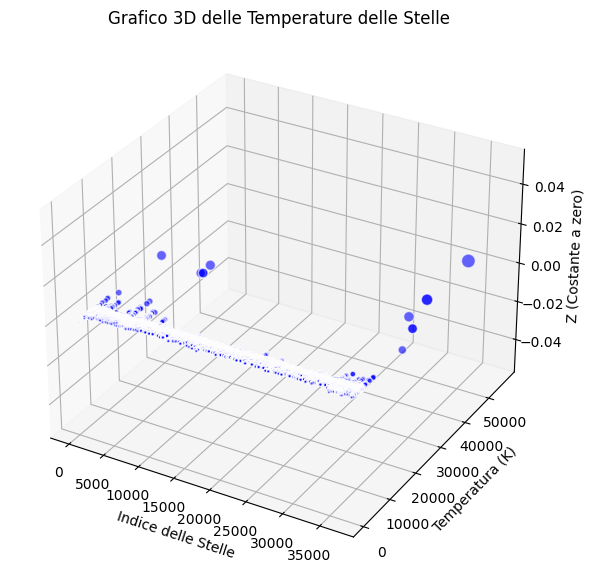

In [14]:
# Crea un grafico 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Usa un array di indici per il primo asse (x)
x = np.arange(len(df_gaia_teff_cleaned))  # Indici delle stelle
y = df_gaia_teff_cleaned['st_teff']  # Valori di temperatura
z = np.zeros_like(x)  # Un array di zeri per posizionare i punti sull'asse z

# Personalizza la grandezza dei punti in base alla temperatura
size = (y - min(y)) / (max(y) - min(y)) * 100  # Dimensioni normalizzate

# Crea il grafico a dispersione 3D
ax.scatter(x, y, z, s=size, c='b', alpha=0.6, edgecolors='w')

# Aggiungi etichette e titolo
ax.set_xlabel('Indice delle Stelle')
ax.set_ylabel('Temperatura (K)')
ax.set_zlabel('Z (Costante a zero)')
ax.set_title('Grafico 3D delle Temperature delle Stelle')

plt.show()